In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('inputs/USDJPY_M15.csv', sep='\t', names=('date', 'time', 'open', 'high', 'low', 'close', 'tickvol', 'vol', 'spread'), skiprows=1)
data['datetime'] = pd.to_datetime(data['date']  + ' ' + data['time'])
data

,date,time,open,high,low,close,tickvol,vol,spread,datetime
0,2020.03.02,00:00:00,107.513,107.754,107.502,107.646,428,0,3,2020-03-02 00:00:00
1,2020.03.02,00:15:00,107.646,107.769,107.629,107.717,399,0,4,2020-03-02 00:15:00
2,2020.03.02,00:30:00,107.717,107.731,107.635,107.640,180,0,11,2020-03-02 00:30:00
3,2020.03.02,00:45:00,107.641,107.646,107.362,107.375,357,0,8,2020-03-02 00:45:00
4,2020.03.02,01:00:00,107.375,107.591,107.361,107.498,1224,0,3,2020-03-02 01:00:00
...,...,...,...,...,...,...,...,...,...,...
28335,2021.04.23,22:45:00,107.877,107.895,107.863,107.893,272,0,0,2021-04-23 22:45:00
28336,2021.04.23,23:00:00,107.892,107.902,107.886,107.900,175,0,0,2021-04-23 23:00:00
28337,2021.04.23,23:15:00,107.903,107.904,107.885,107.887,84,0,0,2021-04-23 23:15:00
28338,2021.04.23,23:30:00,107.886,107.908,107.884,107.888,104,0,0,2021-04-23 23:30:00


In [3]:
# all_data = pd.merge(data, ni225, on='datetime', suffixes=['', '_ni225']).drop(['date_ni225', 'time_ni225'], axis=1)
all_data = data.copy()
all_data

,date,time,open,high,low,close,tickvol,vol,spread,datetime
0,2020.03.02,00:00:00,107.513,107.754,107.502,107.646,428,0,3,2020-03-02 00:00:00
1,2020.03.02,00:15:00,107.646,107.769,107.629,107.717,399,0,4,2020-03-02 00:15:00
2,2020.03.02,00:30:00,107.717,107.731,107.635,107.640,180,0,11,2020-03-02 00:30:00
3,2020.03.02,00:45:00,107.641,107.646,107.362,107.375,357,0,8,2020-03-02 00:45:00
4,2020.03.02,01:00:00,107.375,107.591,107.361,107.498,1224,0,3,2020-03-02 01:00:00
...,...,...,...,...,...,...,...,...,...,...
28335,2021.04.23,22:45:00,107.877,107.895,107.863,107.893,272,0,0,2021-04-23 22:45:00
28336,2021.04.23,23:00:00,107.892,107.902,107.886,107.900,175,0,0,2021-04-23 23:00:00
28337,2021.04.23,23:15:00,107.903,107.904,107.885,107.887,84,0,0,2021-04-23 23:15:00
28338,2021.04.23,23:30:00,107.886,107.908,107.884,107.888,104,0,0,2021-04-23 23:30:00


In [4]:
# extract features from date
all_data['day'] = [i.day for i in all_data['datetime']]
all_data['month'] = [i.month for i in all_data['datetime']]
all_data['year'] = [i.year for i in all_data['datetime']]
all_data['day_of_week'] = [i.dayofweek for i in all_data['datetime']]
all_data['day_of_year'] = [i.dayofyear for i in all_data['datetime']]

all_data['hour'] = [i.hour for i in all_data['datetime']]
all_data['minute'] = [i.minute for i in all_data['datetime']]

all_data

,date,time,open,high,low,close,tickvol,vol,spread,datetime,day,month,year,day_of_week,day_of_year,hour,minute
0,2020.03.02,00:00:00,107.513,107.754,107.502,107.646,428,0,3,2020-03-02 00:00:00,2,3,2020,0,62,0,0
1,2020.03.02,00:15:00,107.646,107.769,107.629,107.717,399,0,4,2020-03-02 00:15:00,2,3,2020,0,62,0,15
2,2020.03.02,00:30:00,107.717,107.731,107.635,107.640,180,0,11,2020-03-02 00:30:00,2,3,2020,0,62,0,30
3,2020.03.02,00:45:00,107.641,107.646,107.362,107.375,357,0,8,2020-03-02 00:45:00,2,3,2020,0,62,0,45
4,2020.03.02,01:00:00,107.375,107.591,107.361,107.498,1224,0,3,2020-03-02 01:00:00,2,3,2020,0,62,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,2021.04.23,22:45:00,107.877,107.895,107.863,107.893,272,0,0,2021-04-23 22:45:00,23,4,2021,4,113,22,45
28336,2021.04.23,23:00:00,107.892,107.902,107.886,107.900,175,0,0,2021-04-23 23:00:00,23,4,2021,4,113,23,0
28337,2021.04.23,23:15:00,107.903,107.904,107.885,107.887,84,0,0,2021-04-23 23:15:00,23,4,2021,4,113,23,15
28338,2021.04.23,23:30:00,107.886,107.908,107.884,107.888,104,0,0,2021-04-23 23:30:00,23,4,2021,4,113,23,30


In [5]:
# dataset = all_data[['open', 'high', 'low', 'close', 'tickvol', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute', 'open_ni225', 'high_ni225', 'low_ni225', 'close_ni225', 'tickvol_ni225']]
dataset = all_data[['open', 'high', 'low', 'close', 'tickvol', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute']]
dataset


,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,hour,minute
0,107.513,107.754,107.502,107.646,428,2,3,2020,0,62,0,0
1,107.646,107.769,107.629,107.717,399,2,3,2020,0,62,0,15
2,107.717,107.731,107.635,107.640,180,2,3,2020,0,62,0,30
3,107.641,107.646,107.362,107.375,357,2,3,2020,0,62,0,45
4,107.375,107.591,107.361,107.498,1224,2,3,2020,0,62,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,22,45
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,23,0
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,23,15
28338,107.886,107.908,107.884,107.888,104,23,4,2021,4,113,23,30


In [6]:
dataset['y'] = dataset['high'].shift(-1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
dataset

,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,hour,minute,y
0,107.513,107.754,107.502,107.646,428,2,3,2020,0,62,0,0,107.769
1,107.646,107.769,107.629,107.717,399,2,3,2020,0,62,0,15,107.731
2,107.717,107.731,107.635,107.640,180,2,3,2020,0,62,0,30,107.646
3,107.641,107.646,107.362,107.375,357,2,3,2020,0,62,0,45,107.591
4,107.375,107.591,107.361,107.498,1224,2,3,2020,0,62,1,0,107.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,22,45,107.902
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,23,0,107.904
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,23,15,107.908
28338,107.886,107.908,107.884,107.888,104,23,4,2021,4,113,23,30,107.903


In [8]:
for i in range(1, 13):
    dataset['shift%s'%i] = dataset['open'].shift(i)

dataset['sma5'] = dataset['open'].rolling(5).mean()
dataset['sma15'] = dataset['open'].rolling(15).mean()
# dataset['sma50'] = dataset['open'].rolling(50).mean()
# dataset['sma100'] = dataset['open'].rolling(100).mean()
dataset

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,...,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15
0,107.513,107.754,107.502,107.646,428,2,3,2020,0,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,107.646,107.769,107.629,107.717,399,2,3,2020,0,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,107.717,107.731,107.635,107.640,180,2,3,2020,0,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.641,107.646,107.362,107.375,357,2,3,2020,0,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107.375,107.591,107.361,107.498,1224,2,3,2020,0,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.5784,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,...,107.934,107.958,107.944,107.952,107.944,107.947,107.975,107.968,107.9146,107.940133
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,...,107.927,107.934,107.958,107.944,107.952,107.944,107.947,107.975,107.9076,107.937000
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,...,107.927,107.927,107.934,107.958,107.944,107.952,107.944,107.947,107.9028,107.932667
28338,107.886,107.908,107.884,107.888,104,23,4,2021,4,113,...,107.933,107.927,107.927,107.934,107.958,107.944,107.952,107.944,107.8934,107.927200


In [9]:
dataset = dataset[100:-1]
dataset

,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,...,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15
100,108.263,108.364,108.236,108.237,1002,3,3,2020,1,63,...,108.332,108.309,108.321,108.432,108.135,108.022,107.966,107.851,108.3036,108.172733
101,108.236,108.273,108.206,108.232,691,3,3,2020,1,63,...,108.336,108.332,108.309,108.321,108.432,108.135,108.022,107.966,108.2836,108.195667
102,108.232,108.320,108.216,108.315,1031,3,3,2020,1,63,...,108.312,108.336,108.332,108.309,108.321,108.432,108.135,108.022,108.2676,108.223600
103,108.315,108.532,108.315,108.522,1231,3,3,2020,1,63,...,108.302,108.312,108.336,108.332,108.309,108.321,108.432,108.135,108.2702,108.254533
104,108.522,108.522,108.350,108.368,1326,3,3,2020,1,63,...,108.305,108.302,108.312,108.336,108.332,108.309,108.321,108.432,108.3136,108.291600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,107.909,107.915,107.860,107.878,297,23,4,2021,4,113,...,107.958,107.944,107.952,107.944,107.947,107.975,107.968,107.968,107.9260,107.944867
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,...,107.934,107.958,107.944,107.952,107.944,107.947,107.975,107.968,107.9146,107.940133
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,...,107.927,107.934,107.958,107.944,107.952,107.944,107.947,107.975,107.9076,107.937000
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,...,107.927,107.927,107.934,107.958,107.944,107.952,107.944,107.947,107.9028,107.932667


In [10]:
dataset.isnull().any()

open           False
high           False
low            False
close          False
tickvol        False
day            False
month          False
year           False
day_of_week    False
day_of_year    False
hour           False
minute         False
y              False
shift1         False
shift2         False
shift3         False
shift4         False
shift5         False
shift6         False
shift7         False
shift8         False
shift9         False
shift10        False
shift11        False
shift12        False
sma5           False
sma15          False
dtype: bool

In [11]:
X = dataset.drop(['y'], axis=1)
y =  dataset['y']

In [12]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [14]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [15]:
# LightGBM parameters
params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'mape'},
        'num_leaves':78,
        'drop_rate':0.05,
        'learning_rate':0.005,
        'seed':0,
        'verbose':0,
        'device': 'cpu',
        'max_depth': -1, 
        'random_state': 0
}

In [16]:
evaluation_results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100000,
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['Train', 'Valid'],
                evals_result=evaluation_results,
                early_stopping_rounds=1000,
                verbose_eval=100)

[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
Training until validation scores don't improve for 1000 rounds
[100]	Train's rmse: 0.793413	Valid's rmse: 0.983629
[200]	Train's rmse: 0.482536	Valid's rmse: 0.603332
[300]	Train's rmse: 0.295091	Valid's rmse: 0.3712
[400]	Train's rmse: 0.182865	Valid's rmse: 0.230413
[500]	Train's rmse: 0.116817	Valid's rmse: 0.14642
[600]	Train's rmse: 0.0793289	Valid's rmse: 0.0967012
[700]	Train's rmse: 0.0593387	Valid's rmse: 0.067898
[800]	Train's rmse: 0.0492901	Valid's rmse: 0.0523025
[900]	Train's rmse: 0.04437	Valid's rmse: 0.0442623
[1000]	Train's rmse: 0.0417319	V

In [17]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

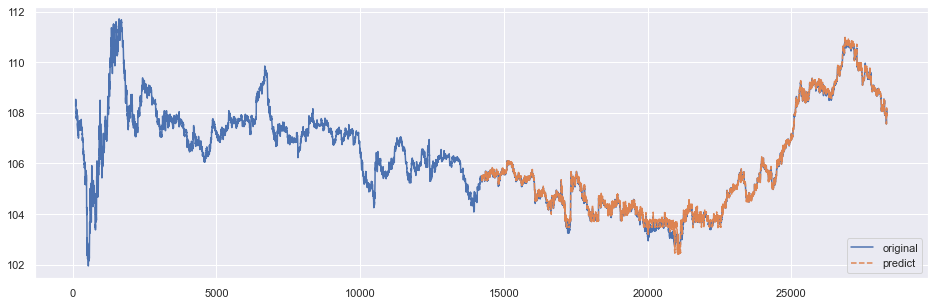

In [18]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

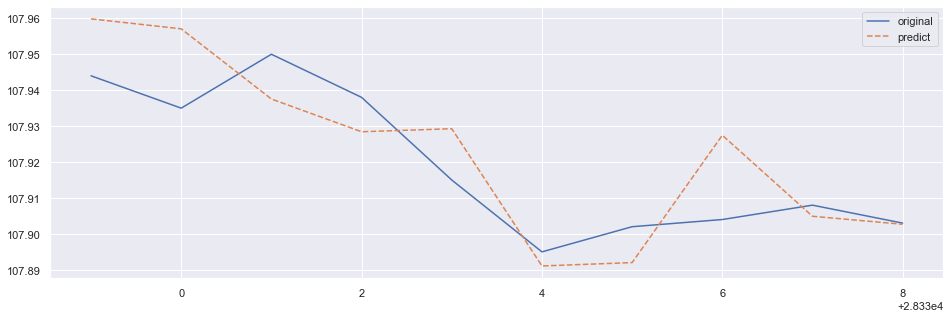

In [19]:
plt.figure(figsize=(16,5))
plt.plot(y[-10:], label='original')
plt.plot(y_[-10:], '--', label='predict')
plt.legend()

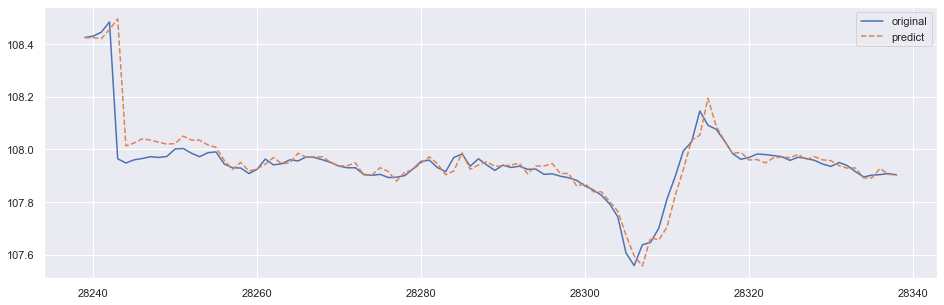

In [20]:
plt.figure(figsize=(16,5))
plt.plot(y[-100:], label='original')
plt.plot(y_[-100:], '--', label='predict')
plt.legend()

In [21]:
predict = dataset[len(y_pred)*-1:]
predict

,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,...,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15
14219,105.414,105.434,105.410,105.414,291,24,9,2020,3,268,...,105.389,105.383,105.400,105.433,105.436,105.406,105.309,105.367,105.4342,105.399133
14220,105.415,105.428,105.393,105.400,232,24,9,2020,3,268,...,105.416,105.389,105.383,105.400,105.433,105.436,105.406,105.309,105.4340,105.401867
14221,105.400,105.414,105.395,105.412,276,24,9,2020,3,268,...,105.471,105.416,105.389,105.383,105.400,105.433,105.436,105.406,105.4198,105.407267
14222,105.414,105.435,105.411,105.423,162,24,9,2020,3,268,...,105.434,105.471,105.416,105.389,105.383,105.400,105.433,105.436,105.4158,105.410400
14223,105.423,105.444,105.423,105.438,174,24,9,2020,3,268,...,105.436,105.434,105.471,105.416,105.389,105.383,105.400,105.433,105.4132,105.418000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,107.909,107.915,107.860,107.878,297,23,4,2021,4,113,...,107.958,107.944,107.952,107.944,107.947,107.975,107.968,107.968,107.9260,107.944867
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,...,107.934,107.958,107.944,107.952,107.944,107.947,107.975,107.968,107.9146,107.940133
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,...,107.927,107.934,107.958,107.944,107.952,107.944,107.947,107.975,107.9076,107.937000
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,...,107.927,107.927,107.934,107.958,107.944,107.952,107.944,107.947,107.9028,107.932667


In [22]:
predict['predict'] = y_pred
predict

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,...,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15,predict
14219,105.414,105.434,105.410,105.414,291,24,9,2020,3,268,...,105.383,105.400,105.433,105.436,105.406,105.309,105.367,105.4342,105.399133,105.453760
14220,105.415,105.428,105.393,105.400,232,24,9,2020,3,268,...,105.389,105.383,105.400,105.433,105.436,105.406,105.309,105.4340,105.401867,105.455208
14221,105.400,105.414,105.395,105.412,276,24,9,2020,3,268,...,105.416,105.389,105.383,105.400,105.433,105.436,105.406,105.4198,105.407267,105.454354
14222,105.414,105.435,105.411,105.423,162,24,9,2020,3,268,...,105.471,105.416,105.389,105.383,105.400,105.433,105.436,105.4158,105.410400,105.454017
14223,105.423,105.444,105.423,105.438,174,24,9,2020,3,268,...,105.434,105.471,105.416,105.389,105.383,105.400,105.433,105.4132,105.418000,105.500167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,107.909,107.915,107.860,107.878,297,23,4,2021,4,113,...,107.944,107.952,107.944,107.947,107.975,107.968,107.968,107.9260,107.944867,107.891081
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,...,107.958,107.944,107.952,107.944,107.947,107.975,107.968,107.9146,107.940133,107.892014
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,...,107.934,107.958,107.944,107.952,107.944,107.947,107.975,107.9076,107.937000,107.927459
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,...,107.927,107.934,107.958,107.944,107.952,107.944,107.947,107.9028,107.932667,107.904906


In [23]:
predict[['y', 'close', 'predict']]

,y,close,predict
14219,105.428,105.414,105.453760
14220,105.414,105.400,105.455208
14221,105.435,105.412,105.454354
14222,105.444,105.423,105.454017
14223,105.440,105.438,105.500167
...,...,...,...
28334,107.895,107.878,107.891081
28335,107.902,107.893,107.892014
28336,107.904,107.900,107.927459
28337,107.908,107.887,107.904906


In [24]:
predict['diff_pred'] = predict['predict'] - predict['close']
predict['diff_act'] = predict['y'] - predict['close']


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
predict[['y', 'close', 'predict', 'diff_pred', 'diff_act']]

,y,close,predict,diff_pred,diff_act
14219,105.428,105.414,105.453760,0.039760,0.014
14220,105.414,105.400,105.455208,0.055208,0.014
14221,105.435,105.412,105.454354,0.042354,0.023
14222,105.444,105.423,105.454017,0.031017,0.021
14223,105.440,105.438,105.500167,0.062167,0.002
...,...,...,...,...,...
28334,107.895,107.878,107.891081,0.013081,0.017
28335,107.902,107.893,107.892014,-0.000986,0.009
28336,107.904,107.900,107.927459,0.027459,0.004
28337,107.908,107.887,107.904906,0.017906,0.021


In [26]:
predict['diff'] = predict['diff_pred'].apply(lambda x: 1 if x >= 0.02 else 0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
predict[predict['diff'] == 1]['diff_act'].sum(), predict[predict['diff'] != 1]['diff_act'].sum()

(276.87399999999957, 75.66200000000022)

In [28]:
predict[predict['diff'] == 1]['diff_act'][-100:]

28196    0.046
28198    0.000
28199    0.090
28200    0.011
28201    0.000
         ...  
28326    0.018
28329    0.010
28330    0.008
28333    0.008
28336    0.004
Name: diff_act, Length: 100, dtype: float64

In [29]:
predict[predict['diff'] == 1]['diff_pred'].sum(), predict[predict['diff'] != 1]['diff_pred'].sum()

(1105.151779784433, -76.26544425972955)

In [42]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = False)

# params = {'max_depth': [5, 7, 9, 11], 'random_state': [0], 'n_estimators': list(range(50, 200, 50)), 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 500]}
params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50)), 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 500]}

# XGBoost
xgb = XGBRegressor()

reg_cv_xgb = GridSearchCV(xgb, params, cv=folds, return_train_score=True)
reg_cv_xgb.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mo...ints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                            

In [43]:
print(reg_cv_xgb.best_params_)
y_pred = reg_cv_xgb.predict(X_test)
y_pred

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500, 'random_state': 0}


array([105.43754 , 105.430855, 105.43357 , ..., 107.91027 , 107.90811 ,
       107.90811 ], dtype=float32)

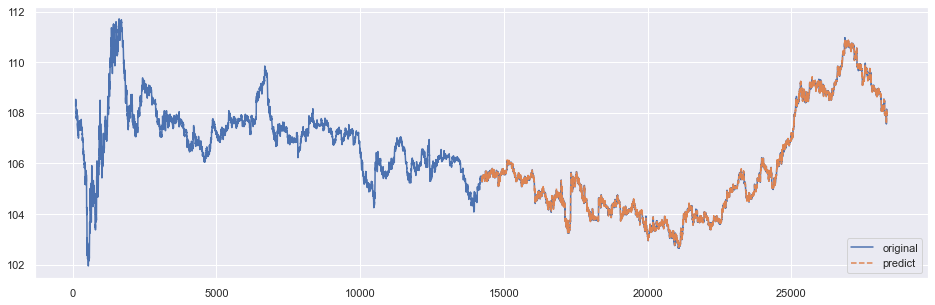

In [44]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

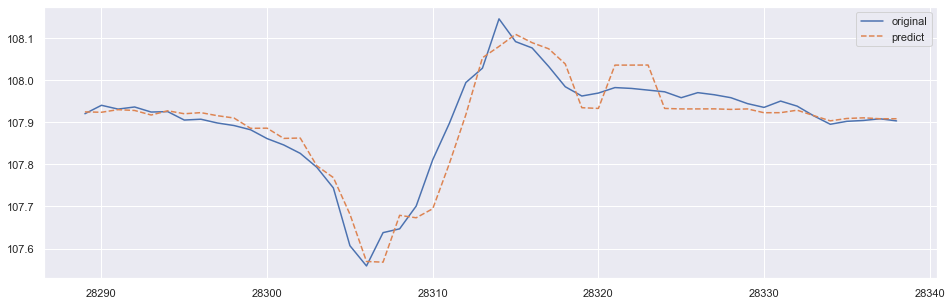

In [45]:
plt.figure(figsize=(16,5))
plt.plot(y[-50:], label='original')
plt.plot(y_[-50:], '--', label='predict')
plt.legend()

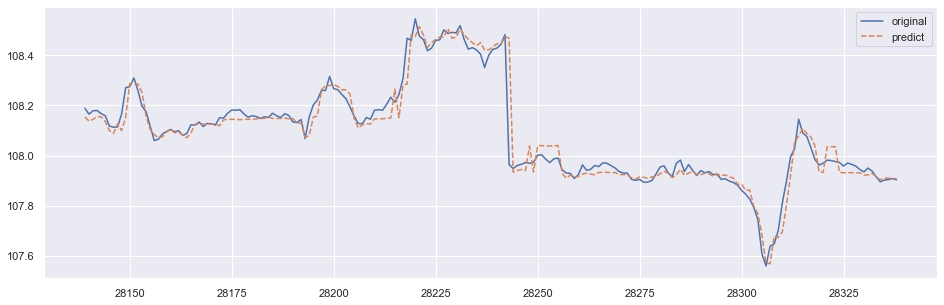

In [46]:
plt.figure(figsize=(16,5))
plt.plot(y[-200:], label='original')
plt.plot(y_[-200:], '--', label='predict')
plt.legend()

In [36]:
from lightgbm import LGBMRegressor

# LightGBM
lgb = LGBMRegressor()

reg_cv_lgb = GridSearchCV(lgb, params, cv=folds, return_train_score=True)
reg_cv_lgb.fit(X, y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [5, 7, 9, 11], 'n_estimators': [100, 500],
                         'random_state': [0]},
             return_train_score=True)

In [37]:
print(reg_cv_lgb.best_params_)
y_pred = reg_cv_lgb.predict(X_test)
# lr_scores('LightGBM(GCV)', reg_cv, y_test, y_pred)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'random_state': 0}


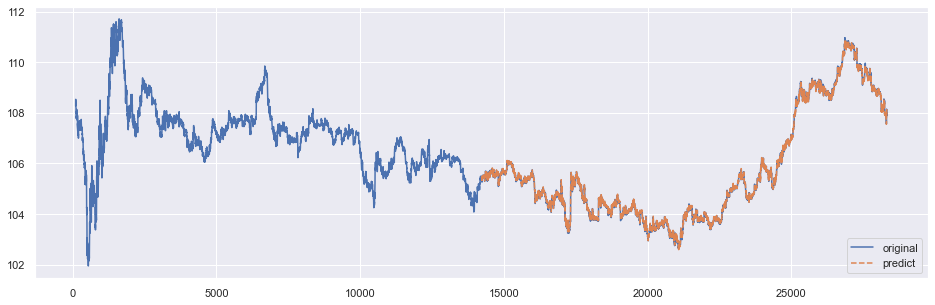

In [38]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

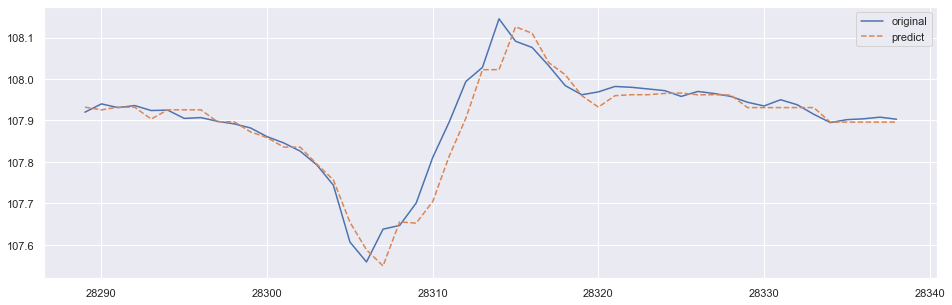

In [41]:
plt.figure(figsize=(16,5))
plt.plot(y[-50:], label='original')
plt.plot(y_[-50:], '--', label='predict')
plt.legend()

In [40]:
import pickle

filename='model.pkl'
pickle.dump(reg_cv_xgb, open(filename, 'wb'))